<a href="https://colab.research.google.com/github/ballmdr/Machine-Learning/blob/master/Deep_Learning_Backpropagation_Pure_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train:  (1050, 2)
y_train:  (1050, 3)


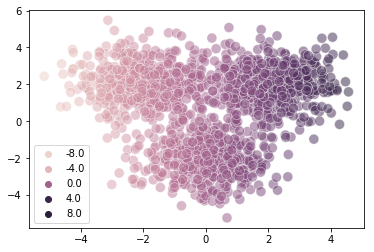

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

N = 500

X1 = np.random.randn(N, 2) + np.array([0, -2])
X2 = np.random.randn(N, 2) + np.array([2, 2])
X3 = np.random.randn(N, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*N + [1]*N + [2]*N)

zero = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  zero[i, Y[i]] = 1

Y = zero
  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)


# let's see what it looks like
sns.scatterplot(X[:,0], X[:,1], hue=X[:,0], s=100, alpha=0.5)
plt.show()

0  cost:  1.4274179774202527
10  cost:  1.3932706913982635
20  cost:  1.3718904876540494
30  cost:  1.2612240839686637
40  cost:  1.0842197012925232
50  cost:  0.7840360363663093
60  cost:  0.6326318952282286
70  cost:  0.5405356806227568
80  cost:  0.48797719002841117
90  cost:  0.4589955179179593
100  cost:  0.442319056208525
110  cost:  0.42838992667786485
120  cost:  0.4105175740017622
130  cost:  0.390718232524656
140  cost:  0.37026757511023894
150  cost:  0.35041277427982687
160  cost:  0.3292555994440614
170  cost:  0.30813812444675215
180  cost:  0.2898474687604393
190  cost:  0.27490547478493726
200  cost:  0.26280755146133106
210  cost:  0.2528963092674314
220  cost:  0.2430882865385397
230  cost:  0.23505312132819822
240  cost:  0.23023996021343573
250  cost:  0.22767639629414177
260  cost:  0.22610883597073145
270  cost:  0.22555749510585624
280  cost:  0.22578386892694963
290  cost:  0.22624206885930306
300  cost:  0.22626961028208883
310  cost:  0.22725442439321797
320  

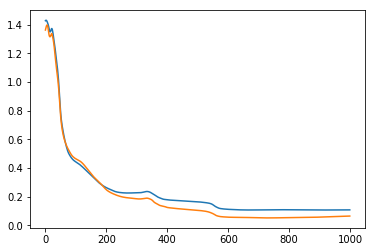

0.9733333333333334


In [17]:
# Deep Neural Network using Only Numpy
lr = 0.000001
epochs = 1000

train_costs = []
test_costs = []

hidden1 = 64
hidden2 = 64
hidden3 = 64
k = 3

w1 = np.random.randn(X.shape[1], hidden1)
b1 = np.random.randn(hidden1)
w2 = np.random.randn(hidden1, hidden2)
b2 = np.random.randn(hidden2)
w3 = np.random.randn(hidden2, hidden3)
b3 = np.random.randn(hidden3)
w4 = np.random.randn(hidden3, k)
b4 = np.random.randn(k)

for i in range(epochs):
  #feed forward train 
  z_train1 = np.tanh(x_train.dot(w1) + b1)
  z_train2 = np.tanh(z_train1.dot(w2) + b2)
  z_train3 = np.tanh(z_train2.dot(w3) + b3)
  y_pred_train = softmax(z_train3.dot(w4) + b4)
  cost_train = cross_entropy(y_train, y_pred_train)
  train_costs.append(cost_train)
  
  if i % 10 == 0:
    print(i, ' cost: ', cost_train)
  
  #feed forward test
  z_test1 = np.tanh(x_test.dot(w1) + b1)
  z_test2 = np.tanh(z_test1.dot(w2) + b2)
  z_test3 = np.tanh(z_test2.dot(w3) + b3)
  y_pred_test = softmax(z_test3.dot(w4) + b4)
  cost_test = cross_entropy(y_test, y_pred_test)
  test_costs.append(cost_test)
  
  #Backpropagation (Gradient descent)
  delta = y_train - y_pred_train
  w4 += z_train3.T.dot(delta) * lr
  b4 += np.sum(delta) * lr
  
  dz3 = delta.dot(w4.T) * (1 - np.power(z_train3, 2))
  
  w3 += z_train2.T.dot(dz3) * lr
  b3 += np.sum(dz3) * lr
  
  dz2 = z_train3.dot(w3.T) * (1 - np.power(z_train2, 2))
  
  w2 += z_train1.T.dot(dz2) * lr
  b2 += np.sum(dz2) * lr
  
  dz = z_train2.dot(w2.T) * (1 - np.power(z_train1, 2))
  
  w1 += x_train.T.dot(dz) * lr
  b1 += np.sum(dz) * lr
  
  
  
plt.plot(train_costs)
plt.plot(test_costs)
plt.show()

print(model_score(predict(y_test), predict(y_pred_test)))